# 第4章: 形態素解析

夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [1]:
from pprint import pprint

with open("./datasets/neko.txt") as neko:
    lines = neko.readlines()
    pprint(lines[1:10])
    neko.close()

['\n',
 '\u3000吾輩は猫である。\n',
 '名前はまだ無い。\n',
 '\n',
 '\u3000どこで生れたかとんと見当がつかぬ。\n',
 '何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。\n',
 '吾輩はここで始めて人間というものを見た。\n',
 'しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ。\n',
 'この書生というのは時々我々を捕えて煮て食うという話である。\n']


## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [2]:
import re
import MeCab

def make_neko_mecab(input_path,output_path):
    with open(input_path,"r") as inputs, open(output_path,"w") as outputs:
        
        mt = MeCab.Tagger('mecabrc')
        result = list()
        outputs.write(mt.parse(inputs.read()))
                      

def neko_txt_mecab(mecab_file):
    with open(mecab_file,"r") as inputs:
        
        result_list = list()
        
        for line in inputs:
            line_elements = re.sub('\t',",",line)
            extracted = line_elements.split(",")
            
            if(len(extracted) == 1):
                continue
            
            result_dict = {
                #表層形
                'surface': extracted[0],
                #基本形
                'base': extracted[7],
                #品詞
                'pos': extracted[1],
                #品詞細分類1
                'pos1': extracted[2],
            }
            result_list.append(result_dict)
            
            if extracted[2] == "句点":
                yield result_list
                result_list = list()

In [3]:
make_neko_mecab("./datasets/neko.txt","./datasets/neko_txt_mecab.txt")
check = neko_txt_mecab("./datasets/neko_txt_mecab.txt")

for_write = list()
for i in check:
    for_write.append(i)
pprint(for_write[0:2])

[[{'base': '一', 'pos': '名詞', 'pos1': '数', 'surface': '一'},
  {'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
  {'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
  {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
  {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
  {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'で'},
  {'base': 'ある', 'pos': '助動詞', 'pos1': '*', 'surface': 'ある'},
  {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}],
 [{'base': '名前', 'pos': '名詞', 'pos1': '一般', 'surface': '名前'},
  {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
  {'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続', 'surface': 'まだ'},
  {'base': '無い', 'pos': '形容詞', 'pos1': '自立', 'surface': '無い'},
  {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}]]


## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [4]:
outputs = list()

for listline in for_write:
    for dictline in listline:
        if dictline["pos"] == "動詞":
            outputs.append(dictline["surface"])

pprint(sorted(outputs)[0:10])

['あ', 'あい', 'あい', 'あい', 'あい', 'あい', 'あい', 'あい', 'あい', 'あい']


## 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [5]:
outputs = list()

for listline in for_write:
    for dictline in listline:
        if dictline["pos"] == "動詞":
            outputs.append(dictline["base"])

pprint(sorted(outputs)[0:10])

['あいかわる', 'あいかわる', 'あう', 'あう', 'あう', 'あがる', 'あがる', 'あがる', 'あがる', 'あがる']


## 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [6]:
outputs = list()

for listline in for_write:
    for dictline in listline:
        if dictline["pos1"] == "サ変接続" and dictline["pos"] == "名詞":
            outputs.append(dictline.items())

pprint(sorted(outputs)[0:10])

[dict_items([('surface', '見当'), ('base', '見当'), ('pos', '名詞'), ('pos1', 'サ変接続')]),
 dict_items([('surface', '記憶'), ('base', '記憶'), ('pos', '名詞'), ('pos1', 'サ変接続')]),
 dict_items([('surface', '話'), ('base', '話'), ('pos', '名詞'), ('pos1', 'サ変接続')]),
 dict_items([('surface', '装飾'), ('base', '装飾'), ('pos', '名詞'), ('pos1', 'サ変接続')]),
 dict_items([('surface', '突起'), ('base', '突起'), ('pos', '名詞'), ('pos1', 'サ変接続')]),
 dict_items([('surface', '運転'), ('base', '運転'), ('pos', '名詞'), ('pos1', 'サ変接続')]),
 dict_items([('surface', '記憶'), ('base', '記憶'), ('pos', '名詞'), ('pos1', 'サ変接続')]),
 dict_items([('surface', '分別'), ('base', '分別'), ('pos', '名詞'), ('pos1', 'サ変接続')]),
 dict_items([('surface', '決心'), ('base', '決心'), ('pos', '名詞'), ('pos1', 'サ変接続')]),
 dict_items([('surface', '我慢'), ('base', '我慢'), ('pos', '名詞'), ('pos1', 'サ変接続')])]


## 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [7]:
outputs = list()

for listline in for_write:
    for dictnumber in range(1,len(listline)):
        if listline[dictnumber]['surface'] == 'の' \
        and listline[dictnumber - 1]['pos'] == '名詞' \
        and listline[dictnumber + 1]['pos'] == '名詞':
            outputs.append(listline[dictnumber - 1]['surface'] + 'の' + listline[dictnumber + 1]['surface'])

pprint(sorted(outputs)[0:10])

['Agnodiceの世話',
 'Agnodiceの逸話',
 'Hierophilusの講義',
 'あいつの事',
 'あいつの垣根',
 'あいつの娘',
 'あいつの御蔭',
 'あかの他人',
 'あくびの用意',
 'あさっての朝']


## 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [8]:
#最長一致とはなるべく長い文字列を得ること（"A+"）。逆は最短一致（"A+?"）
outputs = list()

for listline in for_write:
    output_words = list()
    
    for dictline in listline:
        
        if dictline["pos"] == "名詞":
            output_words.append(dictline["surface"])   
        else:
            if len(output_words) >1:
                outputs.append("".join(output_words))
            output_words = list()
            
pprint(sorted(outputs[0:10]))

['その後猫', 'ぷうぷうと煙', '一度', '一毛', '一番獰悪', '三毛', '人間中', '時妙', '書生以外', '邸内']


## 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [9]:
from collections import Counter

outputs = list()
output_counts = list()

for listline in for_write:
    for dictline in listline:
        outputs.append(dictline["base"])
        
    output_counts = Counter(outputs).most_common()
    
pprint(output_counts[0:10])

[('の', 9194),
 ('。', 7486),
 ('て', 6853),
 ('、', 6772),
 ('は', 6422),
 ('に', 6268),
 ('を', 6071),
 ('だ', 5978),
 ('と', 5515),
 ('が', 5339)]


## 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

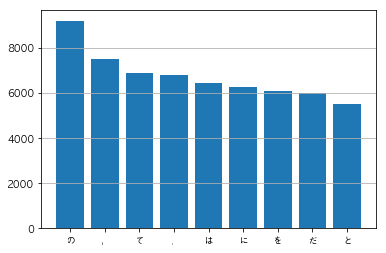

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

plt_x = list() 
plt_y = list()

for i in output_counts[0:9]:
    plt_x.append(i[0])
    plt_y.append(i[1])
    

left = np.array(list(range(0,len(plt_x),)))
height = np.array(plt_y)
font = {'family': 'AppleGothic'}

matplotlib.rc('font', **font)
plt.bar(left,height,tick_label=plt_x, align="center")
plt.grid(axis='y')

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

(1, 50)

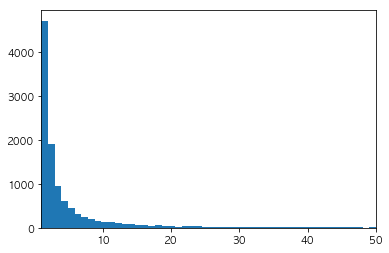

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

plt_x = list() 
plt_y = list()

for i in output_counts:
    plt_y.append(i[1])

plt.hist(plt_y,bins=50,range=(1,50))
plt.xlim(xmin=1, xmax=50)

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

(None, None)

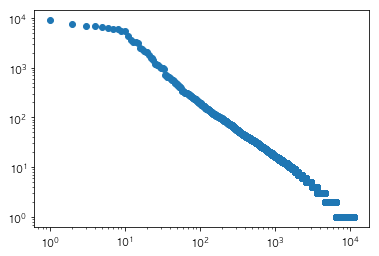

In [12]:
plt.scatter(range(1,len(plt_y)+1),plt_y)
plt.xscale('log'), plt.yscale('log')